In [9]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

In [4]:
# low, upper
# plt.axvline(x=low, color='r', linewidth=2);

# Simulating From the Null Hypothesis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

1. If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the first quiz question below.

2. If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the second quiz question below.



average height for coffee drinkers is the same as for non-coffee drinkers

    H0 : height(coffee) = height(no coffee)
    H1 : height(coffee) <> height(no coffee)
    
average height for coffee drinkers is less than non-coffee drinkers

    H0 : height(coffee) >= height(no coffee)
    H1 : height(coffee) < height(no coffee)


3. For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample. You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means. Use the results of your sampling distribution, to answer the third quiz question below.


In [13]:
# pv("sample_data.mean()")
# pv("sample_data.std()")
# pv("sample_data.var()")

boot_diffs = []
drink_means = []
no_drink_means = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = sample_data.sample(nb_sample, replace=True)
    
    drink_mean = boot_sample.query("drinks_coffee == True")['height'].mean()
    drink_means.append(drink_mean)
    no_drink_mean = boot_sample.query("drinks_coffee == False")['height'].mean()
    no_drink_means.append(no_drink_mean)
    
    boot_diffs.append(drink_mean - no_drink_mean)

# pv("len(drink_means)")
# pv("len(no_drink_means)")
# pv("len(boot_diffs)")


pv("np.mean(drink_means)")
pv("np.mean(no_drink_means)")
pv("np.mean(boot_diffs)")

pv("np.std(drink_means)")
pv("np.std(no_drink_means)")
pv("np.std(boot_diffs)")

plt.hist(drink_means)
plt.show()

plt.hist(no_drink_means)
plt.show()

plt.hist(boot_diffs)
plt.show()
lower, upper = np.percentile(boot_diffs, 2.5), np.percentile(boot_diffs, 97.5)
pv("lower, upper")
pv("upper-lower")
    

np.mean(drink_means) : 68.12096394273642
np.mean(no_drink_means) : 66.78102180744914
np.mean(boot_diffs) : 1.3399421352873044
np.std(drink_means) : 0.24654867763892002
np.std(no_drink_means) : 0.407570022066167
np.std(boot_diffs) : 0.4716533012768733


(array([  17.,   68.,  401., 1171., 2427., 2774., 2043.,  862.,  201.,
          36.]),
 array([67.17045888, 67.34921863, 67.52797839, 67.70673814, 67.8854979 ,
        68.06425765, 68.24301741, 68.42177716, 68.60053692, 68.77929667,
        68.95805643]),
 <a list of 10 Patch objects>)

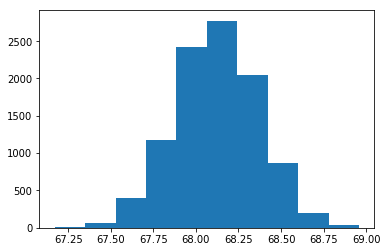

(array([  16.,  107.,  578., 1605., 2648., 2742., 1600.,  579.,  110.,
          15.]),
 array([65.27657893, 65.57718387, 65.87778881, 66.17839375, 66.47899869,
        66.77960363, 67.08020857, 67.38081351, 67.68141845, 67.98202339,
        68.28262833]),
 <a list of 10 Patch objects>)

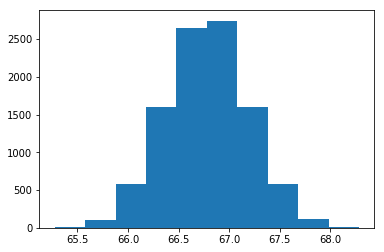

(array([   7.,   66.,  441., 1459., 2825., 2786., 1733.,  567.,  101.,
          15.]),
 array([-0.52897817, -0.16159089,  0.20579639,  0.57318367,  0.94057095,
         1.30795823,  1.67534551,  2.04273279,  2.41012007,  2.77750735,
         3.14489463]),
 <a list of 10 Patch objects>)

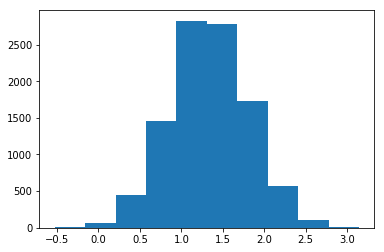

lower, upper : (0.4234875031003181, 2.264930717442466)
upper-lower : 1.841443214342148


### Calculating Errors

Here are two datasets that represent two of the examples you have seen in this lesson.  

One dataset is based on the parachute example, and the second is based on the judicial example.  Neither of these datasets is based on real people.

Use the exercises below to assist in answering the quiz questions at the bottom of this page.

In [3]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')





,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.  

**Hint for quiz:** an error is any time the prediction doesn't match an actual value.  Additionally, there are Type I and Type II errors to think about.  We also know we can minimize one type of error by maximizing the other type of error.  If we predict all individuals as innocent, how many of the guilty are incorrectly labeled?  Similarly, if we predict all individuals as guilty, how many of the innocent are incorrectly labeled?

Total percentage of errors

Percentage of Type I Errors

Percentage of Type II Errors

If everyone was predicted to be guilty, the proportion of Type I Errors made.

If everyone was predicted to be guilty, the proportion of Type II Errors made.


In [15]:
jud_data.head()
nb_cases = jud_data.shape[0]
errors = jud_data.query("actual != predicted")
nb_errors = errors.shape[0]
pv("nb_errors/nb_cases")
errors_type_1 = jud_data.query("actual == 'innocent' and predicted == 'guilty'")
pv("errors_type_1.shape[0]/nb_cases")
errors_type_2 = jud_data.query("actual == 'guilty' and predicted == 'innocent'")
pv("errors_type_2.shape[0]/nb_cases")

errors_type_1 = jud_data.query("actual == 'innocent'")
pv("errors_type_1.shape[0]/nb_cases")
errors_type_2 = 0 # because no one is innocent !

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


nb_errors/nb_cases : 0.042152958945489497
errors_type_1.shape[0]/nb_cases : 0.001510366607167376
errors_type_2.shape[0]/nb_cases : 0.04064259233832212
errors_type_1.shape[0]/nb_cases : 0.45159961554304545


`2.` Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

These should be very similar operations to those you performed in the previous question.
Total percentage of errors

Percentage of Type I Errors

Percentage of Type II Errors

If every parachute was predicted to not open, the proportion of Type I Errors made.

If every parachute was predicted to not open, the proportion of Type II Errors made.


In [24]:
par_data.actual.unique()

nb_cases = par_data.shape[0]
errors = par_data.query("actual != predicted")
nb_errors = errors.shape[0]
pv("nb_errors/nb_cases")
errors_type_1 = par_data.query("actual == 'fails' and predicted == 'opens'")
pv("errors_type_1.shape[0]/nb_cases")
errors_type_2 = par_data.query("actual == 'opens' and predicted == 'fails'")
pv("errors_type_2.shape[0]/nb_cases")

errors_type_2 = par_data.query("actual == 'opens'")
pv("errors_type_2.shape[0]/nb_cases")

array(['opens', 'fails'], dtype=object)

nb_errors/nb_cases : 0.039972551037913875
errors_type_1.shape[0]/nb_cases : 0.00017155601303825698
errors_type_2.shape[0]/nb_cases : 0.03980099502487562
errors_type_2.shape[0]/nb_cases : 0.9917653113741637


### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 


In [26]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

full_data.head(2)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249


`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 

Use **quiz 2** below to assure your answers are correct.  

In [31]:
pv("np.mean(full_data.height)")
pv("np.std(full_data.height)")
sample1 = full_data.sample(5)
pv("np.mean(sample1.height)")
means = []
for _ in range(10_000):
    means.append()
pv("np.std(sample1.height)")


np.mean(full_data.height) : 67.59748697307937
np.std(full_data.height) : 3.1189087116821472


`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

